# Brain Tumor Classification Task
Alessio Carnevale, Manuel Cattoni, Carlo Schillaci

Dataset link: [Kaggle](https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

from functions import display_images_by_category, display_image_with_annotations, display_images_with_coco_annotations, visualize_annotation_mask, create_mask, sample_annotation_mask_pixels
from skimage import io
import os


import kagglehub
import random

In [2]:
# Download latest version
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\manuc\.cache\kagglehub\datasets\pkdarabi\brain-tumor-image-dataset-semantic-segmentation\versions\1


In [3]:
# Load the annotations file
with open('Dataset/train/_annotations.coco.json', 'r') as file:
    annotations = json.load(file)

# Print the JSON content in a readable format
print(json.dumps(annotations, indent=4))

{
    "info": {
        "year": "2023",
        "version": "1",
        "description": "Exported from roboflow.com",
        "contributor": "",
        "url": "https://public.roboflow.com/object-detection/undefined",
        "date_created": "2023-08-19T04:37:54+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "https://creativecommons.org/licenses/by/4.0/",
            "name": "CC BY 4.0"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "Tumor",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "0",
            "supercategory": "Tumor"
        },
        {
            "id": 2,
            "name": "1",
            "supercategory": "Tumor"
        }
    ],
    "images": [
        {
            "id": 0,
            "license": 1,
            "file_name": "2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg",
            "height": 640,
            "width": 640,
            "da

In [4]:
with open('Dataset/train/_annotations.coco.json','r') as file:
    train = json.load(file)

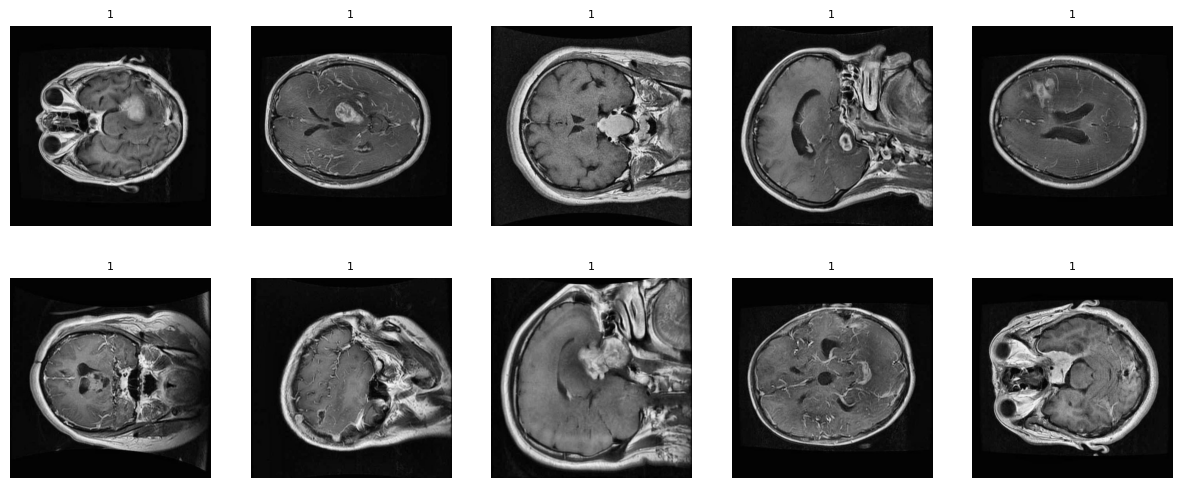

In [5]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

plt.show()

JSON description for 2533_jpg.rf.4e07c599fab9fccab408201ce20b9bbd.jpg:
{'id': 125, 'license': 1, 'file_name': '2533_jpg.rf.4e07c599fab9fccab408201ce20b9bbd.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1160_jpg.rf.037cb12e8b3952bbfe98a9c90a6e7e40.jpg:
{'id': 815, 'license': 1, 'file_name': '1160_jpg.rf.037cb12e8b3952bbfe98a9c90a6e7e40.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 2446_jpg.rf.c3b8eb936719e5d96c700a18eb0d5f99.jpg:
{'id': 277, 'license': 1, 'file_name': '2446_jpg.rf.c3b8eb936719e5d96c700a18eb0d5f99.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 2900_jpg.rf.d0c55bbe918cb59922020387fec9d930.jpg:
{'id': 358, 'license': 1, 'file_name': '2900_jpg.rf.d0c55bbe918cb59922020387fec9d930.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1699_jpg.rf.8d055867a794dbb12cb

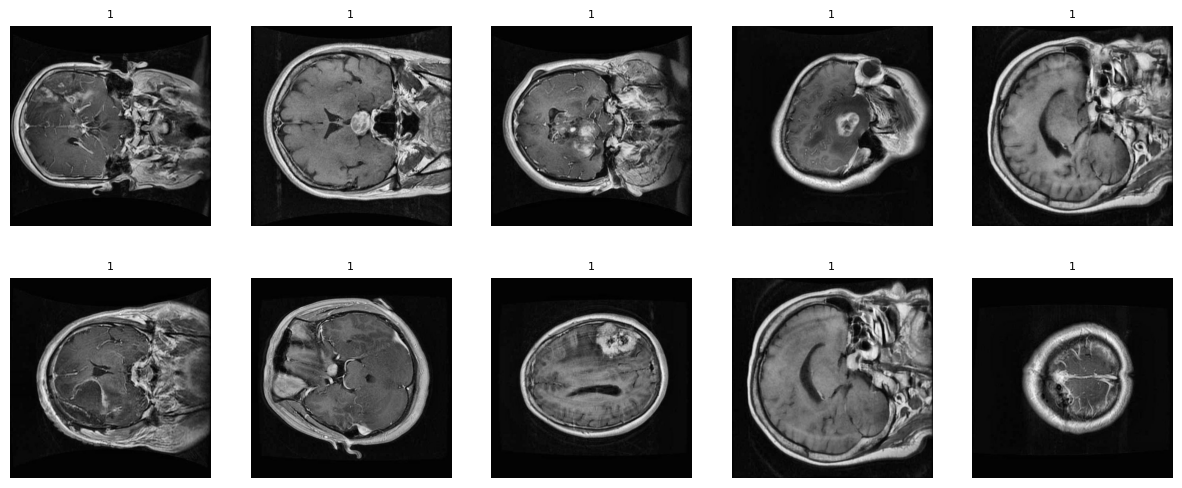

In [6]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

    # Print the full JSON description for the image
    print(f"JSON description for {img_info['file_name']}:")
    print(img_info)

plt.show()

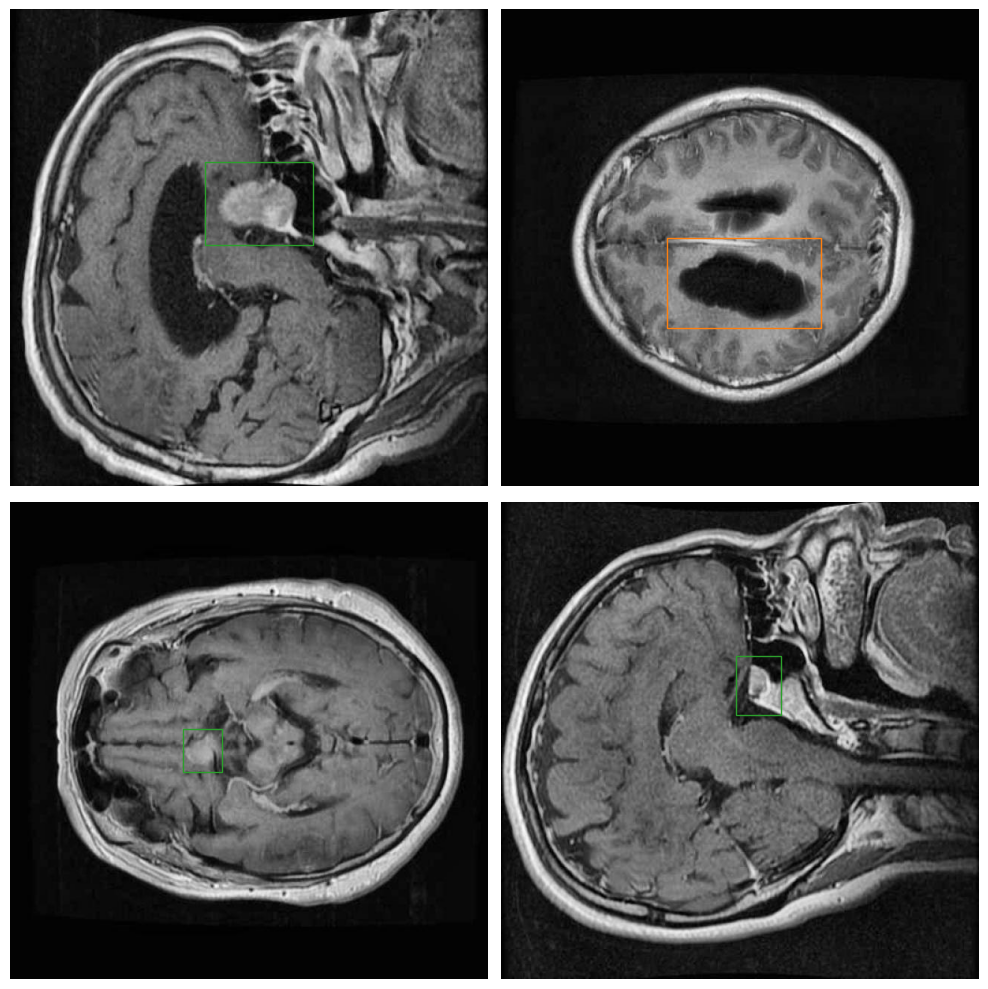

In [7]:
all_image_files = [os.path.join('Dataset/train', img['file_name']) for img in train['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, train, display_type)

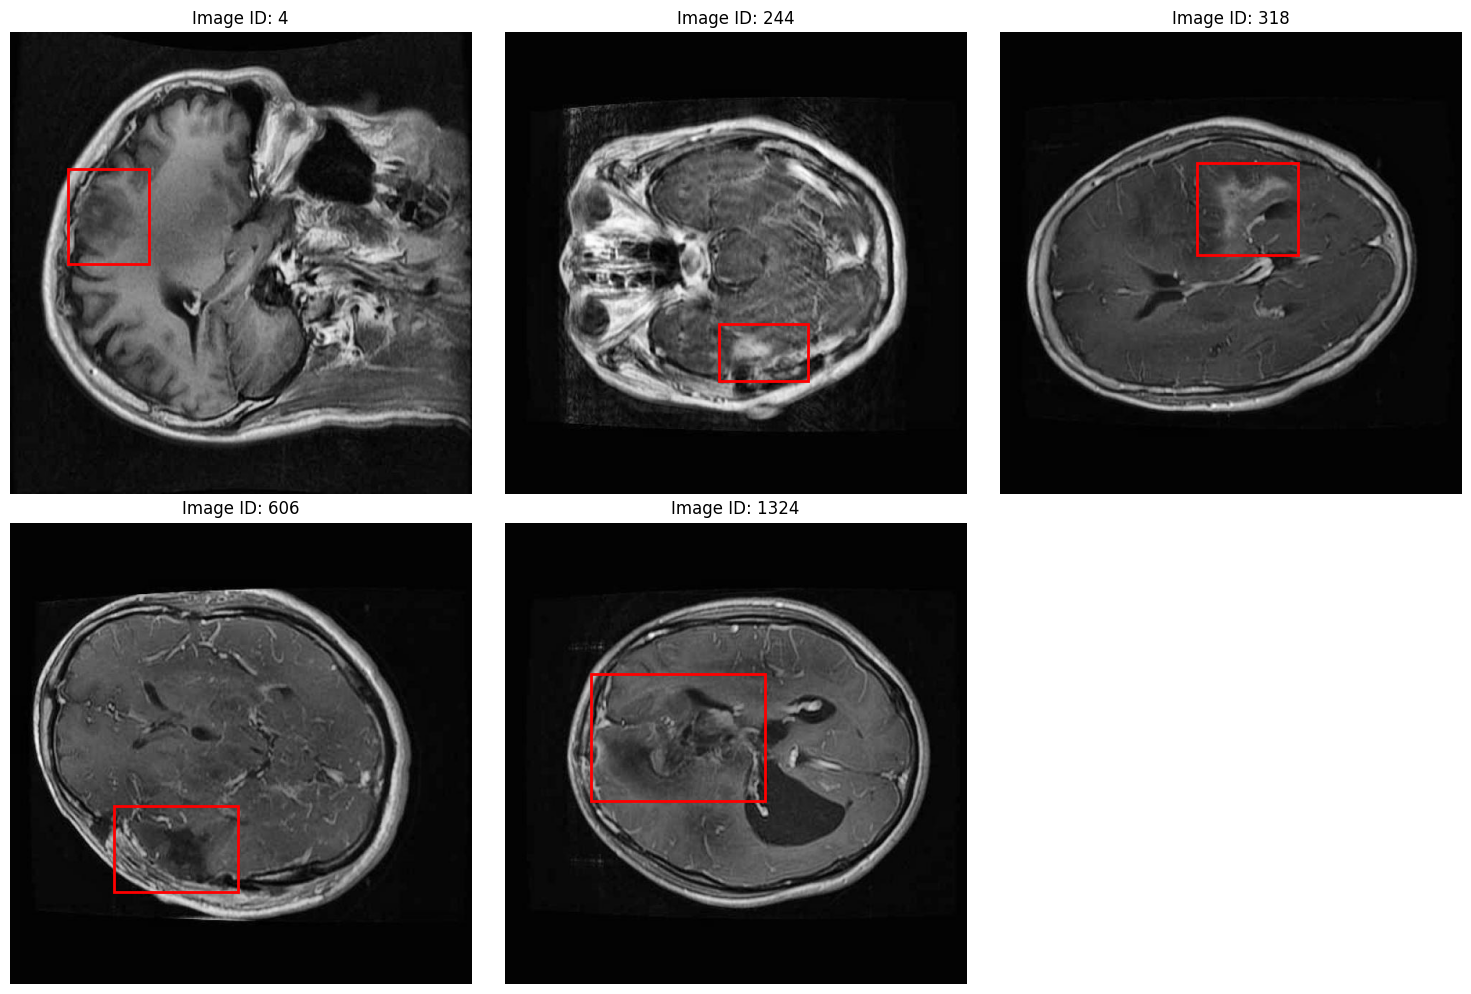

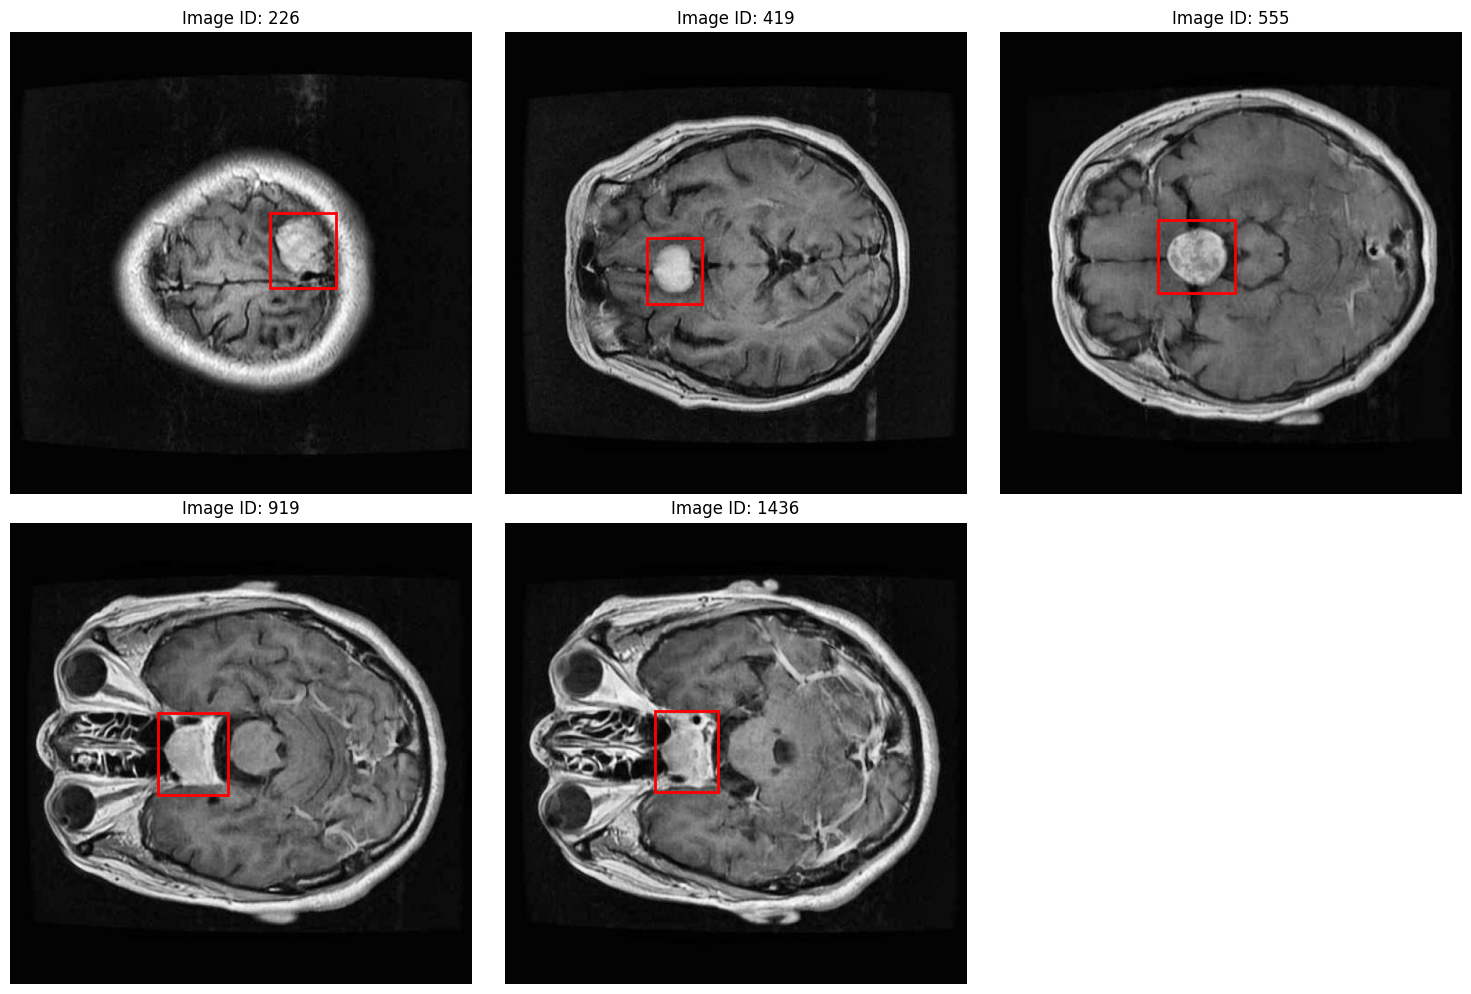

In [8]:
# Display 5 random images for category_id = 1
display_images_by_category(train, category_id=1, num_images=5)

# Display 5 random images for category_id = 2
display_images_by_category(train, category_id=2, num_images=5)

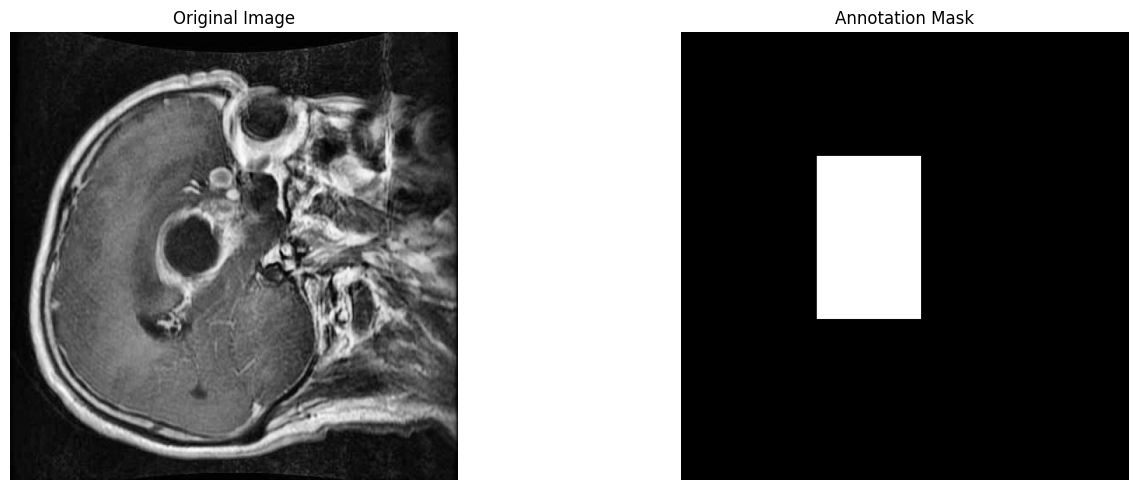

In [9]:
# Example usage
visualize_annotation_mask(train, image_id=1, show_annotations=False)

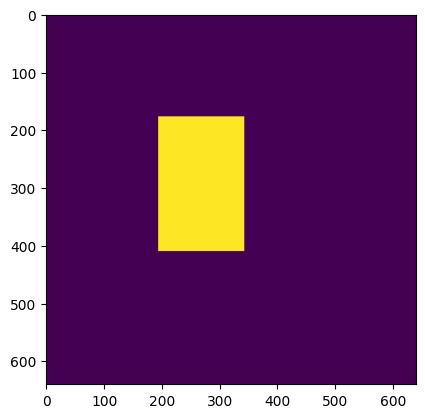

In [10]:
test_mask = create_mask(train, image_id=1)
plt.imshow(test_mask)

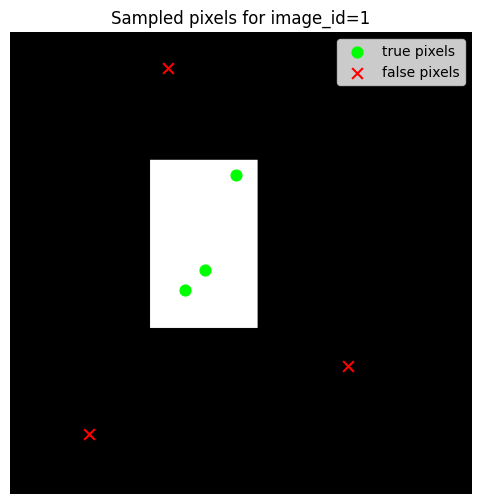

True pixels: [(329, 270), (197, 312), (357, 242)]
False pixels: [(50, 219), (462, 468), (557, 109)]


In [11]:
image_id = 1
mask = create_mask(train, image_id=1)

samples = sample_annotation_mask_pixels(
    mask, num_true=3, num_false=3, random_state=42
)

plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.scatter(
    [coord[1] for coord in samples["true"]],
    [coord[0] for coord in samples["true"]],
    marker='o',
    color='lime',
    label='true pixels',
    s=60,
)
plt.scatter(
    [coord[1] for coord in samples["false"]],
    [coord[0] for coord in samples["false"]],
    marker='x',
    color='red',
    label='false pixels',
    s=60,
)
plt.legend()
plt.title(f"Sampled pixels for image_id={image_id}")
plt.axis('off')
plt.show()

print("True pixels:", samples["true"])
print("False pixels:", samples["false"])

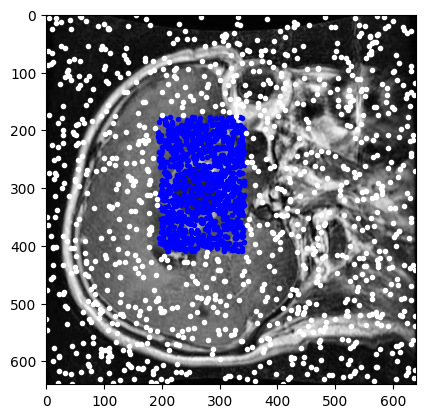

In [12]:
def pick_random_centers(mask, size=100, ignore=0):
    rs, cs = np.where(mask)
    ix = np.random.randint(len(rs), size=size)
    return rs[ix], cs[ix]

patches = []
labels = []

image_info = next((img for img in annotations['images'] if img['id'] == image_id), None)
img_path = os.path.join('Dataset/train', image_info['file_name'])
im = io.imread(img_path)

plt.imshow(im)
rs,cs = pick_random_centers(test_mask, size=1000, ignore=32)
plt.plot(cs, rs, 'b.')
for r,c in zip(rs,cs):
    patches.append(im[r-32:r+32, c-32:c+32, :])
    labels.append(test_mask[r,c])

rs,cs = pick_random_centers(~test_mask, size=1000, ignore=32)
plt.plot(cs, rs, 'w.')
for r,c in zip(rs,cs):
    patches.append(im[r-32:r+32, c-32:c+32, :])
    labels.append(test_mask[r,c])

In [24]:
a = 0
b = 0
for n in labels:
    if n != 255:
        a+=1
    else:
        b += 1
        
print(a)
print(b)

1000
1000


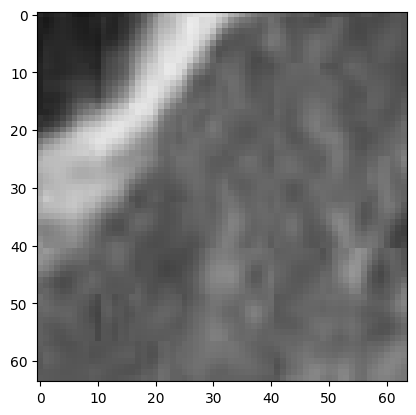

In [19]:
plt.imshow(patches[0])